<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Naive_Bayes_SMS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing necessary Liabraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#Loading the Dataset
from google.colab import files
uploaded=files.upload()

Saving SMSMessages2.csv to SMSMessages2.csv


In [61]:
import pandas as pd
import io
messages=pd.read_csv("SMSMessages2.csv",
                           names=["message", "label"])
messages.head()
messages.shape

(201, 2)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Number of ham and spam messages')

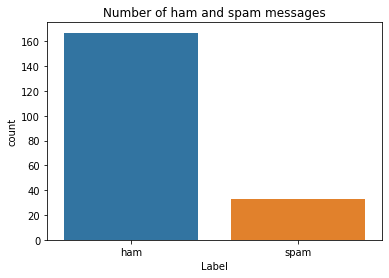

In [79]:
#Visualize the number of ham and spam messages
sns.countplot(df['Class_Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

so, we have total of 201 records i.e. messages and two labels i.e. ham and spam.

In [51]:
#Data cleaning and preprocessing

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)

['messag']
['messag', 'go jurong point']
['messag', 'go jurong point', 'ok lar joke wif u oni']
['messag', 'go jurong point', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli']
['messag', 'go jurong point', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say']
['messag', 'go jurong point', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf']
['messag', 'go jurong point', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf', 'freemsg hey darl week word back like fun still tb ok xxx std chg send']
['messag', 'go jurong point', 'ok lar jo

In [52]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
y

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=uint8)

In [0]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [59]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
y_pred


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [60]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9024390243902439
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.97      0.92      0.94        36

    accuracy                           0.90        41
   macro avg       0.77      0.86      0.80        41
weighted avg       0.92      0.90      0.91        41



col_0,0,1
row_0,,
0,4,1
1,3,33


In [66]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Here the model has done a great job in predicting classiying the Text as Ham and Spam with the accuracy score of 90%.
It has correctly identified 4 messages as Ham and 33 Messages as spam and incorrectly identified 1 ham message as spam and 3 spam message as Ham.

In [81]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111.csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
   
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])